# Pipline For the Supervised Text-CNN Approach

In [1]:
import numpy as np
import pandas as pd
from utils import *
from text_cnn import *
from graph import *
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to /home/ll3165/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


/home/ll3165/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# 1. Read in and preprocess data

In [2]:
data, label, word_index = process_text(file_path = 'embed_train.csv')

# 2. Load in the pretrained and self-trained FastText Word2Vec model

In [3]:
embedding_matrix = load_weights(pretrained_model = './wiki.en.bin', self_trained_model = './fil9.bin', word_index = word_index)

# 3. Build up the Text-CNN model

In [30]:
textcnn = TextCNN(data = data, label = label, embedding_matrix = embedding_matrix, dropout = 0.2)

# 4. Train the model on training set and plot the training process

## Skip that step if you already have a trained model in the 'model' directory

Train on 210 samples, validate on 60 samples
Epoch 1/60
 - 6s - loss: 0.7326 - acc: 0.5833 - val_loss: 0.7335 - val_acc: 0.5500
Epoch 2/60
 - 3s - loss: 0.5590 - acc: 0.7381 - val_loss: 0.6813 - val_acc: 0.5833
Epoch 3/60
 - 3s - loss: 0.4307 - acc: 0.8024 - val_loss: 0.6743 - val_acc: 0.6083
Epoch 4/60
 - 3s - loss: 0.3720 - acc: 0.8333 - val_loss: 0.6554 - val_acc: 0.6417
Epoch 5/60
 - 3s - loss: 0.3030 - acc: 0.8905 - val_loss: 0.6106 - val_acc: 0.7083
Epoch 6/60
 - 3s - loss: 0.2359 - acc: 0.9500 - val_loss: 0.6620 - val_acc: 0.6833
Epoch 7/60
 - 3s - loss: 0.1871 - acc: 0.9476 - val_loss: 0.6774 - val_acc: 0.6667
Epoch 8/60
 - 3s - loss: 0.1465 - acc: 0.9738 - val_loss: 0.6213 - val_acc: 0.7083
Epoch 9/60
 - 3s - loss: 0.1132 - acc: 0.9881 - val_loss: 0.6257 - val_acc: 0.6917
Epoch 10/60
 - 3s - loss: 0.0922 - acc: 0.9952 - val_loss: 0.7544 - val_acc: 0.6917
Epoch 11/60
 - 3s - loss: 0.0735 - acc: 0.9976 - val_loss: 0.6838 - val_acc: 0.7000
Epoch 12/60
 - 3s - loss: 0.0560 - acc: 

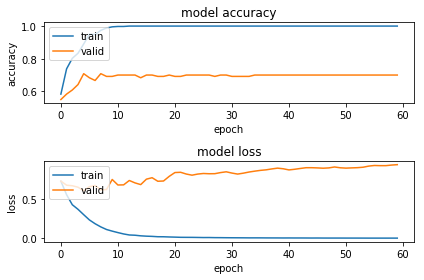

In [31]:
model = textcnn.train(learning_rate = 0.0005, loss = 'binary_crossentropy', epochs = 60, batch_size = 50, plot = True)

# 5. Test the model on test set

In [32]:
textcnn.test(model_path = './saved_model.hdf')

Accuracy:  0.7666666666666667
F1 score:  0.8
AUC:  0.7666666666666666
Precision:  0.7
Recall:  0.9333333333333333


# 6. Plot the graph

## graph_type includes 'known', 'related', and 'all'

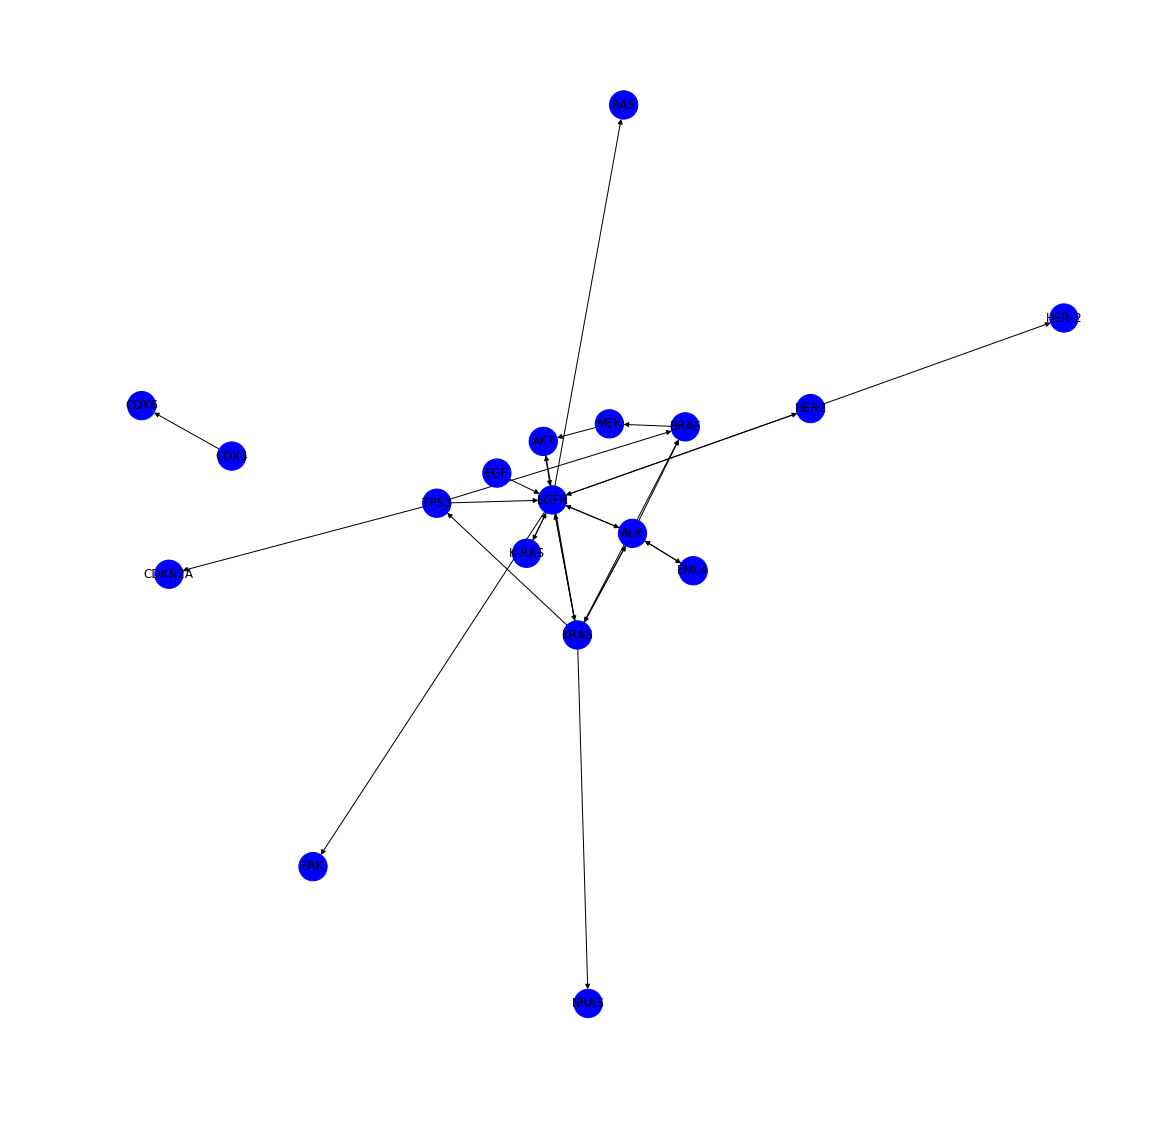

In [34]:
# Connected graph for known cancer genes
draw_graph(graph_type ='known', prediction_path = './predictions.csv', kegg_genes = './kegg_genes.json', 
               all_genes = './all_other_genes.json')

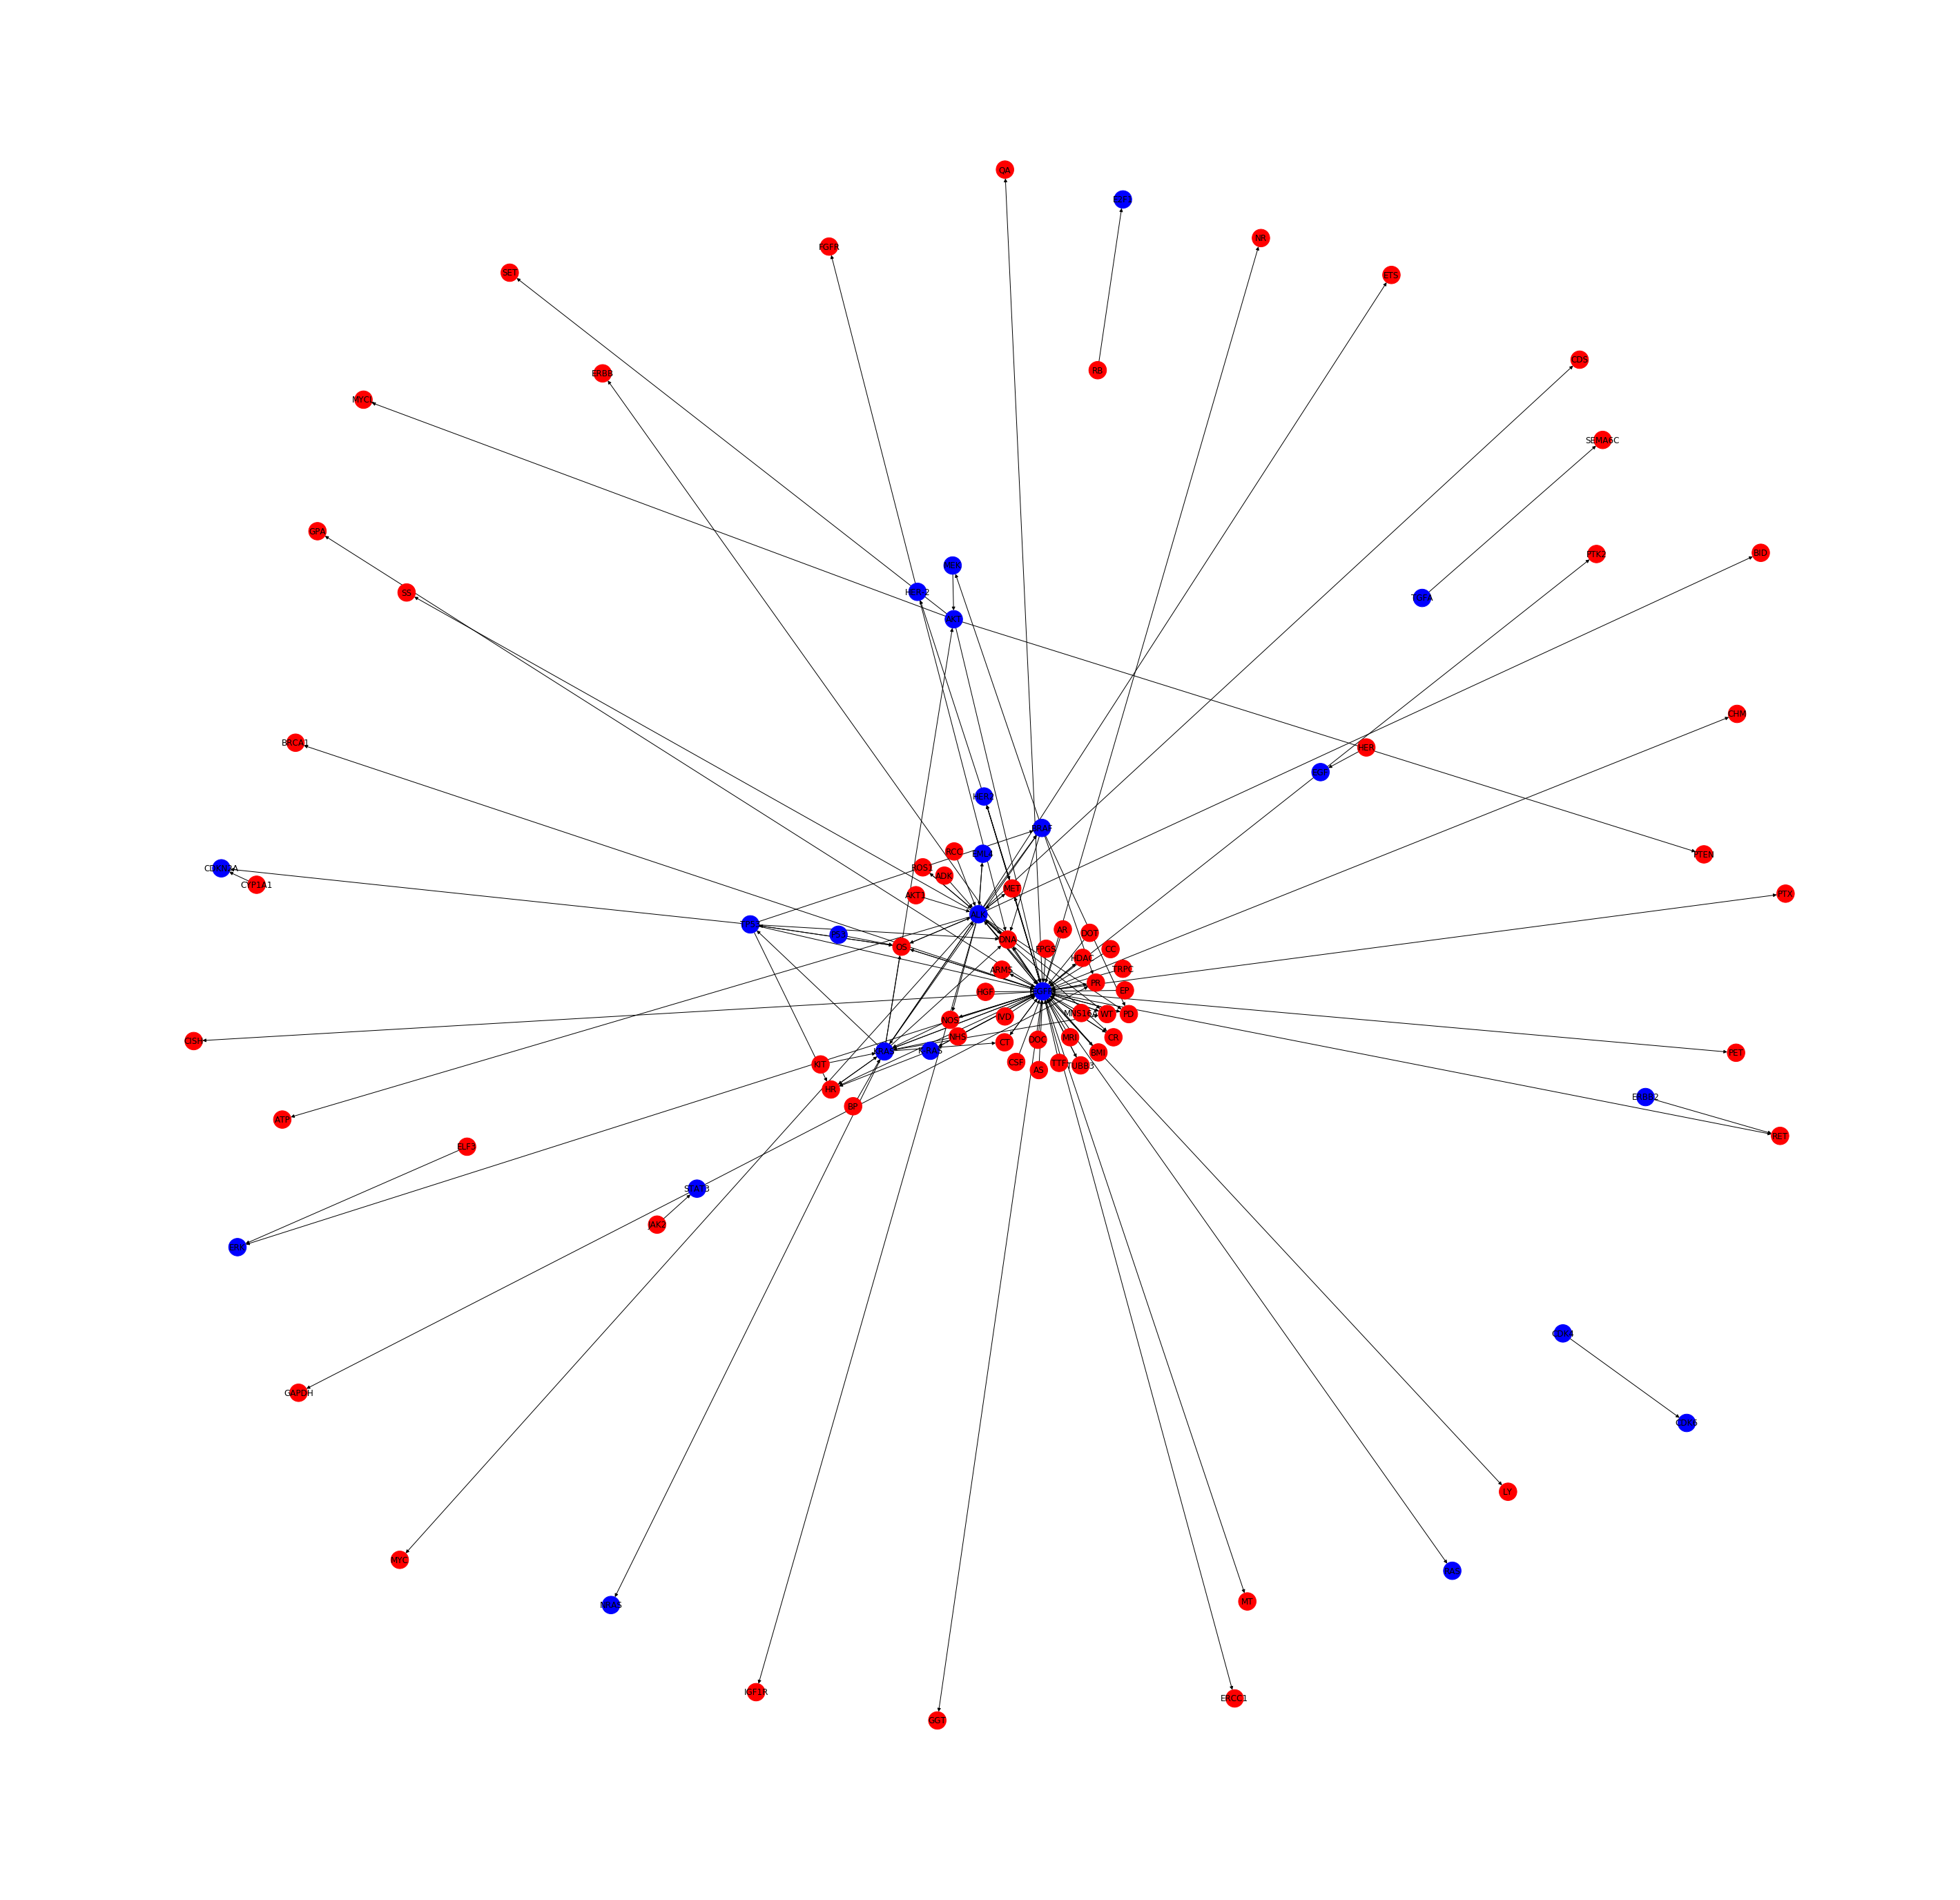

In [35]:
# Connected graph for known cancner genes and genes related to known cancer genes 
draw_graph(graph_type ='related', prediction_path = './predictions.csv', kegg_genes = './kegg_genes.json', 
               all_genes = './all_other_genes.json')

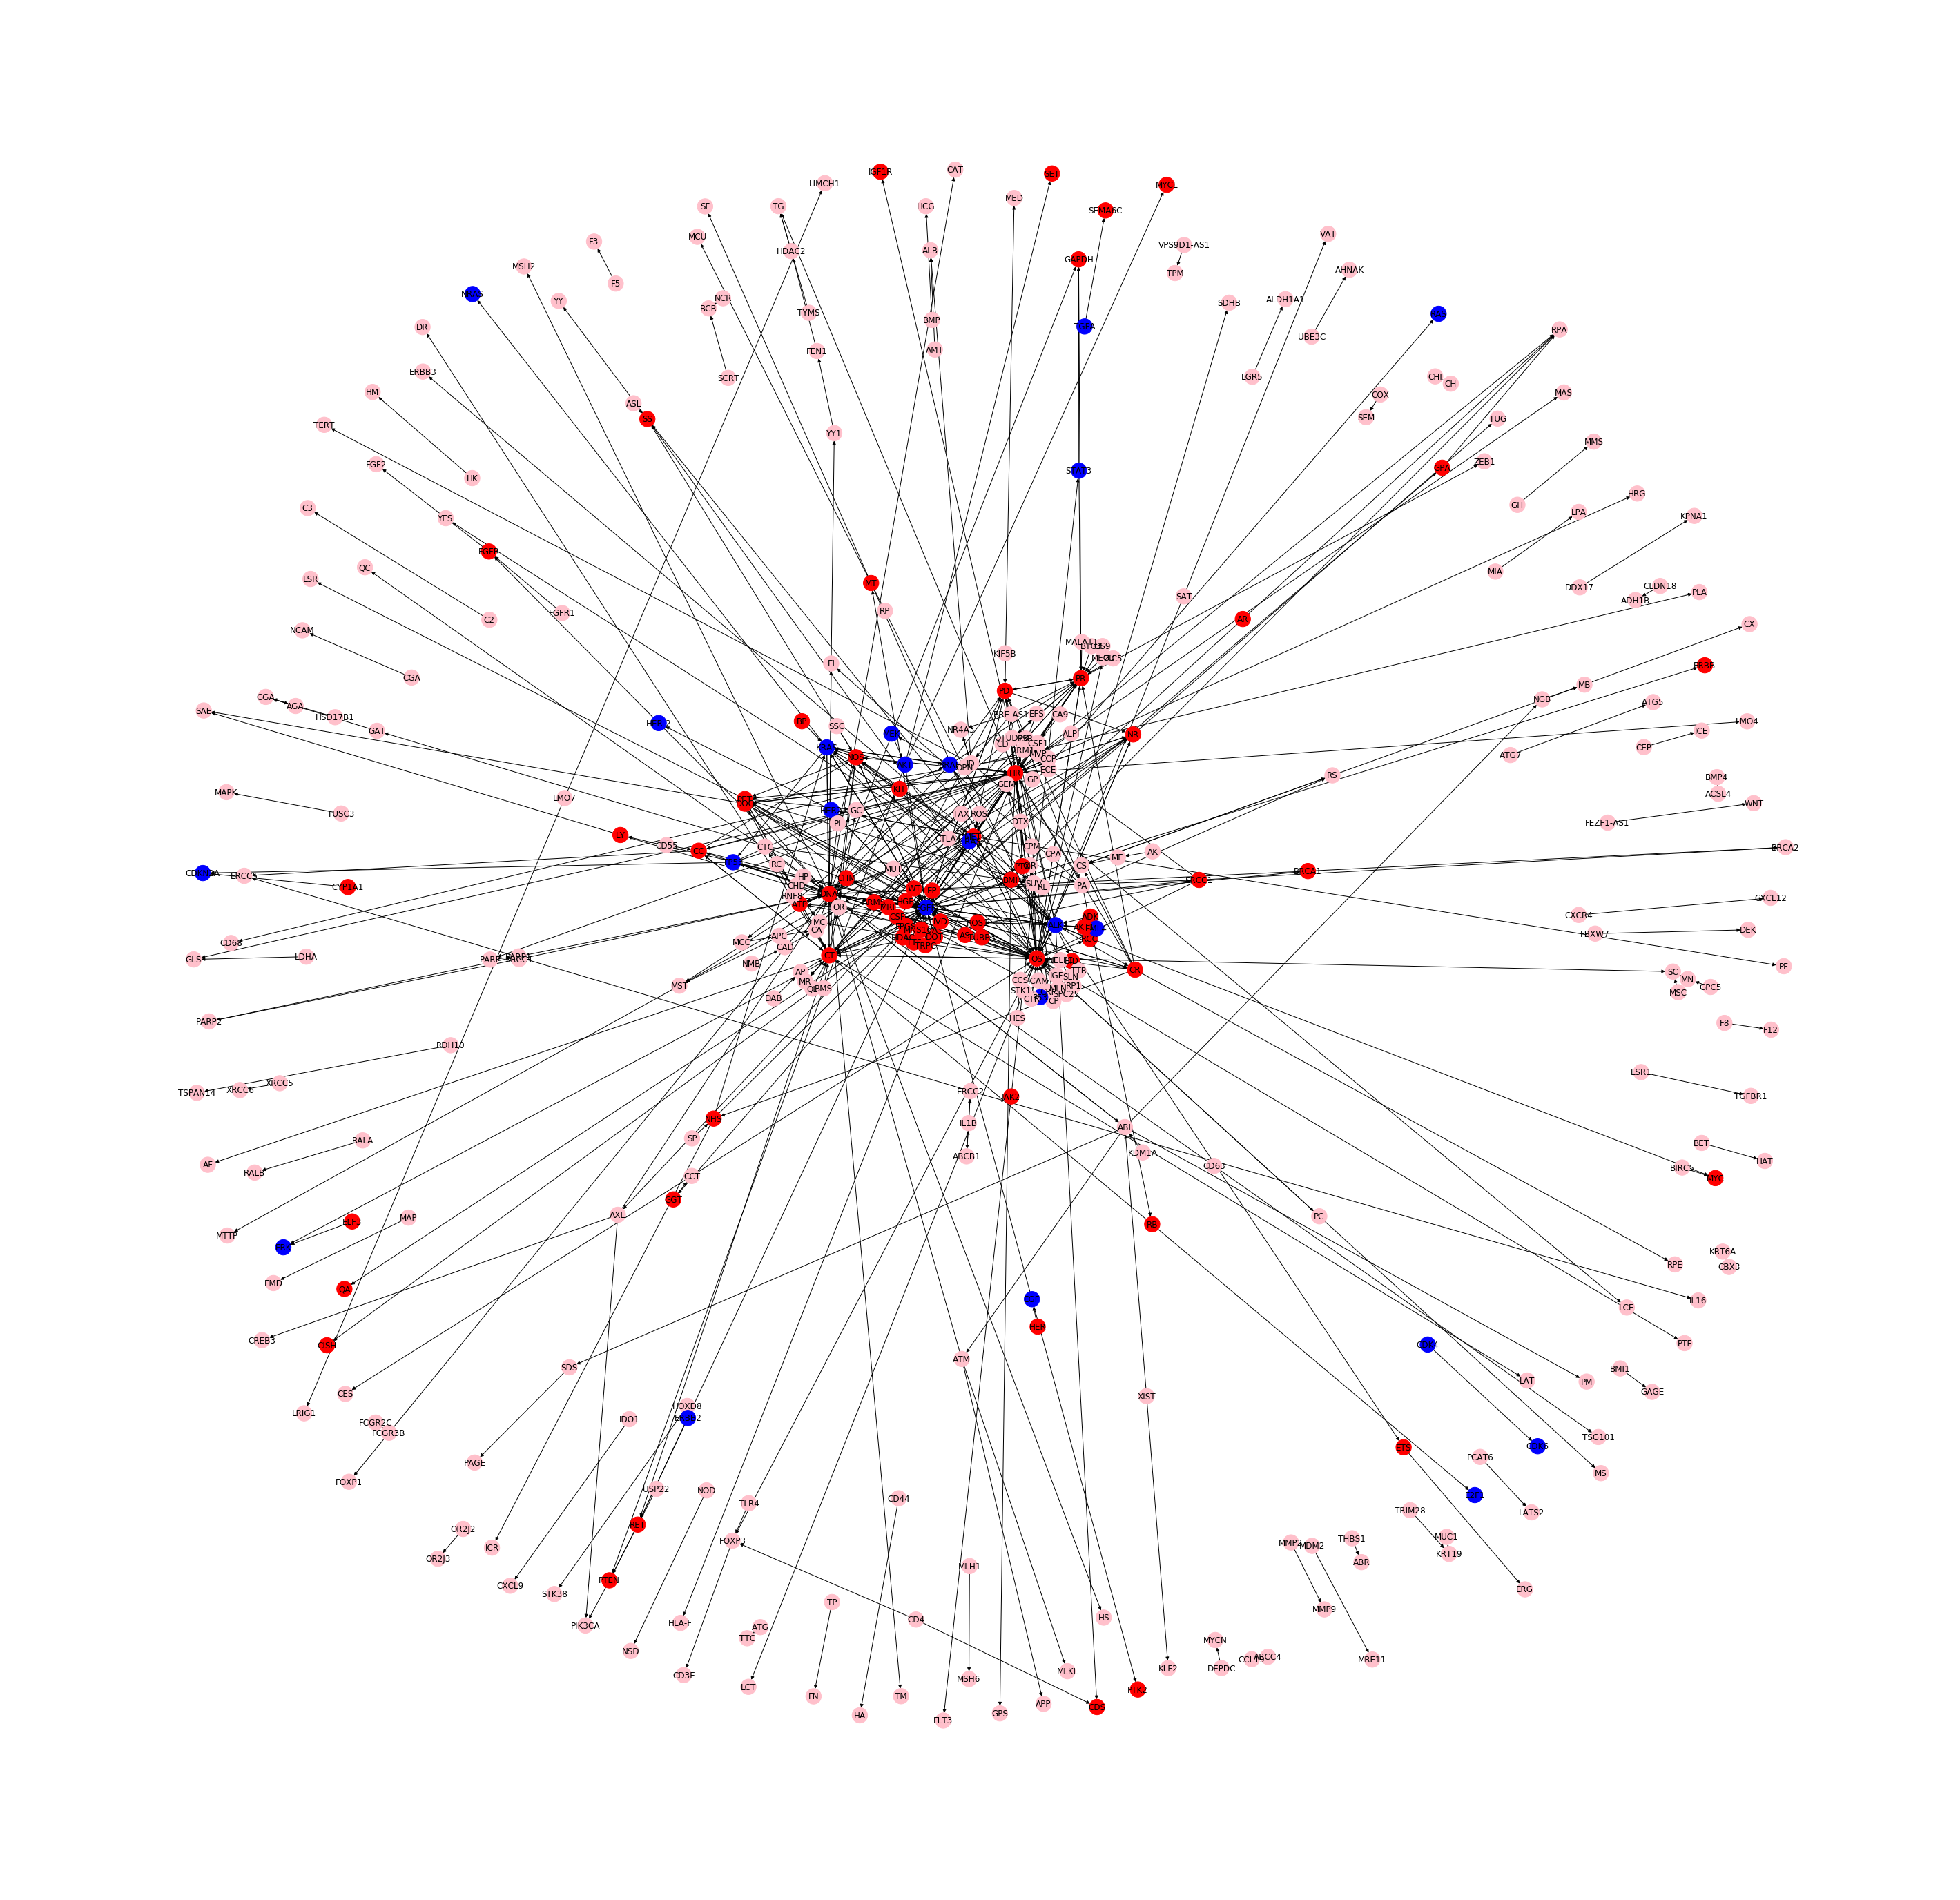

In [36]:
# Connected graph for all genes in the corpus
draw_graph(graph_type ='all', prediction_path = './predictions.csv', kegg_genes = './kegg_genes.json', 
               all_genes = './all_other_genes.json')